In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, GlobalAveragePooling2D,MaxPooling2D, Dense,BatchNormalization, Dropout, Activation

In [3]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, GlobalAveragePooling2D,MaxPooling2D, Dense,BatchNormalization, Dropout, Activation

In [4]:
def improved_model(size=100):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(size, size, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))  # Pooling reduces overfitting

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(GlobalAveragePooling2D())

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))  # Increased dropout to prevent overfitting

    model.add(Dense(2, activation='softmax'))

    return model

Training dataset for pothole.

In [5]:
size = 100

# Load Training data: pothole
potholeTrainImages = [os.path.join("/content/drive/MyDrive/Dataset/train/Pothole", img)
                      for img in os.listdir("/content/drive/MyDrive/Dataset/train/Pothole")
                      if img.endswith((".jpg", ".jpeg", ".png"))]

train1 = []
for img_path in potholeTrainImages:
    img = cv2.imread(img_path, 0)
    if img is not None:  # Check if the image is read successfully
        img_resized = cv2.resize(img, (size, size))
        train1.append(img_resized)

temp1 = np.asarray(train1)

training dataset for non pothole

In [6]:
# Load Training data: non-pothole
nonPotholeTrainImages = [os.path.join("/content/drive/MyDrive/Dataset/train/Plain", img)
                         for img in os.listdir("/content/drive/MyDrive/Dataset/train/Plain")
                         if img.endswith((".jpg", ".jpeg", ".png"))]

train2 = []
for img_path in nonPotholeTrainImages:
    img = cv2.imread(img_path, 0)
    if img is not None:  # Check if the image is read successfully
        img_resized = cv2.resize(img, (size, size))
        train2.append(img_resized)

temp2 = np.asarray(train2)


testing data for non pothole.

In [7]:
# Load Testing data: non-pothole
nonPotholeTestImages = [os.path.join("/content/drive/MyDrive/Dataset/test/Plain", img)
                        for img in os.listdir("/content/drive/MyDrive/Dataset/test/Plain")
                        if img.endswith((".jpg", ".jpeg", ".png"))]

test2 = []
for img_path in nonPotholeTestImages:
    img = cv2.imread(img_path, 0)
    if img is not None:  # Check if the image is read successfully
        img_resized = cv2.resize(img, (size, size))
        test2.append(img_resized)

temp4 = np.asarray(test2)


testing dataset for potholes.


In [8]:
# Load Testing data: potholes
potholeTestImages = [os.path.join("/content/drive/MyDrive/Dataset/test/Pothole", img)
                      for img in os.listdir("/content/drive/MyDrive/Dataset/test/Pothole")
                      if img.endswith((".jpg", ".jpeg", ".png"))]

test1 = []
for img_path in potholeTestImages:
    img = cv2.imread(img_path, 0)
    if img is not None:  # Check if the image is read successfully
        img_resized = cv2.resize(img, (size, size))
        test1.append(img_resized)

temp3 = np.asarray(test1)

In [9]:
X_train = np.concatenate((temp1, temp2))
X_test = np.concatenate((temp3, temp4))



y_train1 = np.ones(temp1.shape[0], dtype=int)
y_train2 = np.zeros(temp2.shape[0], dtype=int)
y_test1 = np.ones(temp3.shape[0], dtype=int)
y_test2 = np.zeros(temp4.shape[0], dtype=int)

y_train = np.concatenate((y_train1, y_train2))
y_test = np.concatenate((y_test1, y_test2))

X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("train shape X", X_train.shape)
print("train shape y", y_train.shape)


train shape X (700, 100, 100)
train shape y (700, 2)


In [10]:
# Set input size
size = 100  # Define size if not already defined
model = improved_model(size)  # Use the improved model
model.compile(optimizer=Adam(learning_rate=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)



# Evaluate the model (Ensure X_test and y_test are defined)
metrics = model.evaluate(X_test, y_test)

# Print evaluation metrics
for metric_name, metric_value in zip(model.metrics_names, metrics):
    print('{}: {:.4f}'.format(metric_name, metric_value))

# Save the model and weights
print("Saving model weights and configuration file")
model.save('sample.h5')

# Save model architecture as JSON
model_json = model.to_json()
with open("truesample.json", "w") as json_file:
    json_file.write(model_json)

# Save only the model weights
model.save_weights("truesample.weights.h5")  # ✅ Correct filename

print("Saved model to disk")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6495 - loss: 0.6289 - val_accuracy: 0.4286 - val_loss: 0.6953
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 850ms/step - accuracy: 0.7531 - loss: 0.5014 - val_accuracy: 0.5286 - val_loss: 0.6878
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 892ms/step - accuracy: 0.7981 - loss: 0.4821 - val_accuracy: 0.5286 - val_loss: 0.6868
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 869ms/step - accuracy: 0.8377 - loss: 0.3787 - val_accuracy: 0.5429 - val_loss: 0.7145
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 903ms/step - accuracy: 0.8473 - loss: 0.3629 - val_accuracy: 0.5429 - val_loss: 0.7180
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 856ms/step - accuracy: 0.8649 - loss: 0.3272 - val_accuracy: 0.5429 - val_loss: 0.7711
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 851ms/step - accuracy: 0.8394 - loss: 0.3381 - val_accuracy: 0.5429 - val_loss: 0.7956
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 858ms/step - accuracy: 0.8727 - loss: 0.2850 - val_accurac

loss: 0.7148
compile_metrics: 0.4375
Saving model weights and configuration file
Saved model to disk


the code uses a Convolutional Neural Network (CNN) model for image classification. CNNs are a type of deep learning model that are widely used in computer vision tasks, including image classification, object detection, and image segmentation.

In the provided code, the model architecture is defined using the Keras library, which is a high-level neural networks API running on top of TensorFlow. The model architecture consists of convolutional layers (Conv2D), activation layers (Activation), pooling layers (GlobalAveragePooling2D), and fully connected layers (Dense). The specific model architecture used in the code is a simplified CNN model for image classification. It's not named or referred to by a specific pre-existing model name, as it seems to be a custom-designed architecture for the task at hand.

Overall, the technology used here is deep learning, specifically utilizing a convolutional neural network (CNN) model, for image classification, which is a subset of machine learning.

Predicting model

In [11]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Raw prediction for /content/drive/MyDrive/Dataset/test/Plain/8.jpg: [[0.591009   0.40899104]]
Prediction: Plain


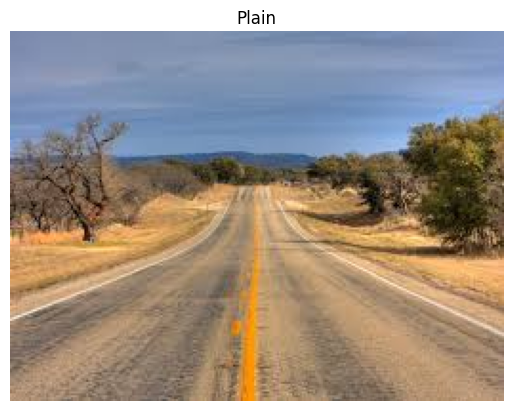

In [ ]:

# Load the saved model
model = load_model('sample.h5')

# Function to predict whether an image contains a pothole or not
def predict_image(image_path):
    size = 100
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    img_resized = cv2.resize(img, (size, size))
    img_resized = img_resized / 255.0  # Normalize
    img_resized = np.expand_dims(img_resized, axis=0)  # Add batch dimension
    img_resized = np.expand_dims(img_resized, axis=-1)  # Reshape for model

    prediction = model.predict(img_resized)  # Get prediction

    print(f"Raw prediction for {image_path}: {prediction}")  # Debugging step

    return "Plain" if np.argmax(prediction) == 0 else "Pothole"


# Example usage
image_path = "/content/drive/MyDrive/Dataset/test/Plain/8.jpg"
prediction = predict_image(image_path)
print("Prediction:", prediction)

# Displaying the image
img = cv2.imread(image_path)  # Read the image

# Convert BGR image to RGB for displaying with Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img_rgb)
plt.title(prediction)  # Display prediction as title
plt.axis('off')  # Hide axis
plt.show()


Testing Pothole datset

In [ ]:
testing_dataset_path = "/content/drive/MyDrive/Dataset/test/Pothole/"

# Iterate over images from 1 to 8
for i in range(1, 9):
    image_name = str(i) + ".jpg"
    image_path = os.path.join(testing_dataset_path, image_name)

    # Read the image
    img = cv2.imread(image_path)

    # Convert BGR image to RGB for displaying with Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.imshow(img_rgb)
    plt.title(image_name)
    plt.axis('off')  # Hide axis
    plt.show()

    # Make prediction
    prediction = predict_image(image_path)
    print("Image:", image_name, "Prediction:", prediction)

Output hidden; open in https://colab.research.google.com to view.

Detecting potholes in images

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the directory containing testing dataset images
testing_dataset_path = "/content/drive/MyDrive/Dataset/test/Pothole/"

# Function to mark potholes in an image
def mark_potholes(image_path):
    # Read the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Perform pothole detection (replace this with your actual pothole detection algorithm)
    # For demonstration, let's assume you have detected potholes and their coordinates
    potholes = [(100, 100, 200, 200), (300, 300, 400, 400)]  # Example pothole coordinates (x1, y1, x2, y2)

    # Mark potholes by drawing bounding boxes
    for (x1, y1, x2, y2) in potholes:
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw green bounding box

    return img_rgb

# Iterate over images from 1 to 8
for i in range(1, 9):
    image_name = str(i) + ".jpg"
    image_path = os.path.join(testing_dataset_path, image_name)

    # Mark potholes in the image
    marked_image = mark_potholes(image_path)

    # Display the marked image using Matplotlib
    plt.imshow(marked_image)
    plt.title(image_name)
    plt.axis('off')  # Hide axis
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

Testing Plain datset

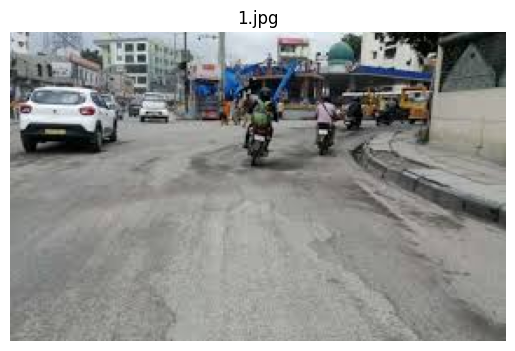

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Raw prediction for /content/drive/MyDrive/Dataset/test/Plain/1.jpg: [[0.48980558 0.5101944 ]]
Image: 1.jpg Prediction: Pothole


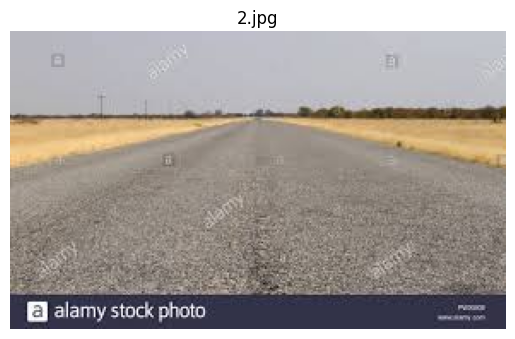

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Raw prediction for /content/drive/MyDrive/Dataset/test/Plain/2.jpg: [[0.62381345 0.3761865 ]]
Image: 2.jpg Prediction: Plain


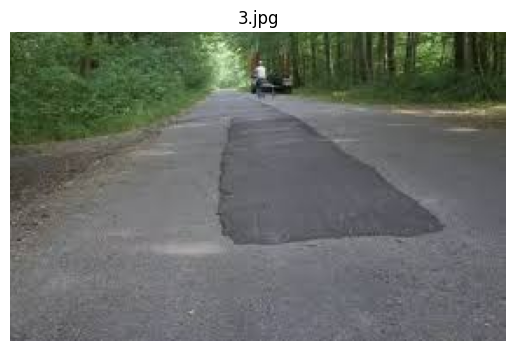

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Raw prediction for /content/drive/MyDrive/Dataset/test/Plain/3.jpg: [[0.61974066 0.38025936]]
Image: 3.jpg Prediction: Plain


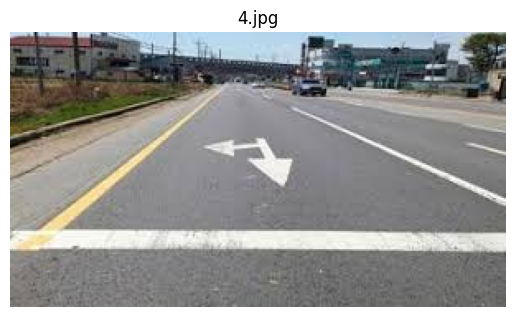

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Raw prediction for /content/drive/MyDrive/Dataset/test/Plain/4.jpg: [[0.53891677 0.46108326]]
Image: 4.jpg Prediction: Plain


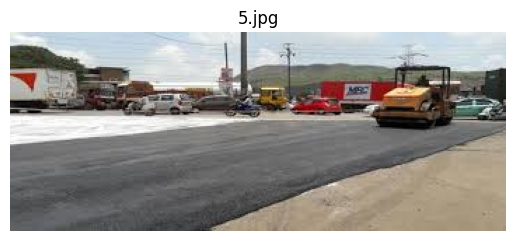

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Raw prediction for /content/drive/MyDrive/Dataset/test/Plain/5.jpg: [[0.52048784 0.4795121 ]]
Image: 5.jpg Prediction: Plain


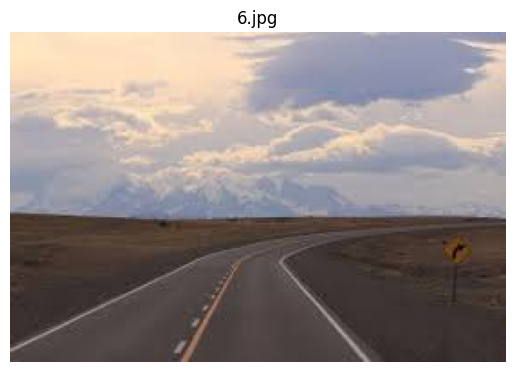

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Raw prediction for /content/drive/MyDrive/Dataset/test/Plain/6.jpg: [[0.6919172  0.30808285]]
Image: 6.jpg Prediction: Plain


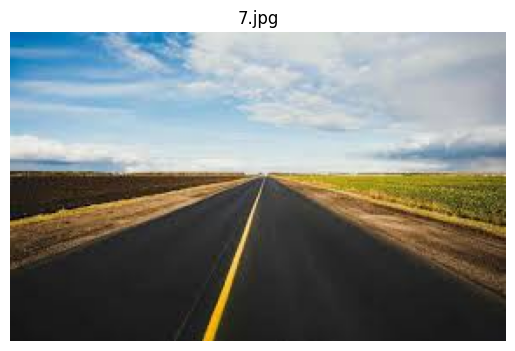

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Raw prediction for /content/drive/MyDrive/Dataset/test/Plain/7.jpg: [[0.6605805 0.3394195]]
Image: 7.jpg Prediction: Plain


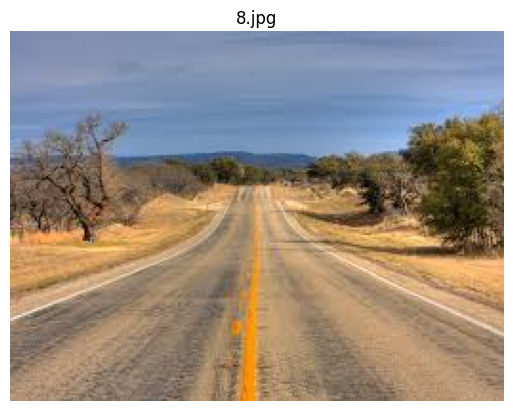

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Raw prediction for /content/drive/MyDrive/Dataset/test/Plain/8.jpg: [[0.591009   0.40899104]]
Image: 8.jpg Prediction: Plain


In [ ]:
testing_dataset_path = "/content/drive/MyDrive/Dataset/test/Plain/"

# Iterate over images from 1 to 8
for i in range(1, 9):
    image_name = str(i) + ".jpg"
    image_path = os.path.join(testing_dataset_path, image_name)

    # Read the image
    img = cv2.imread(image_path)

    # Convert BGR image to RGB for displaying with Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.imshow(img_rgb)
    plt.title(image_name)
    plt.axis('off')  # Hide axis
    plt.show()

    # Make prediction
    prediction = predict_image(image_path)
    print("Image:", image_name, "Prediction:", prediction)

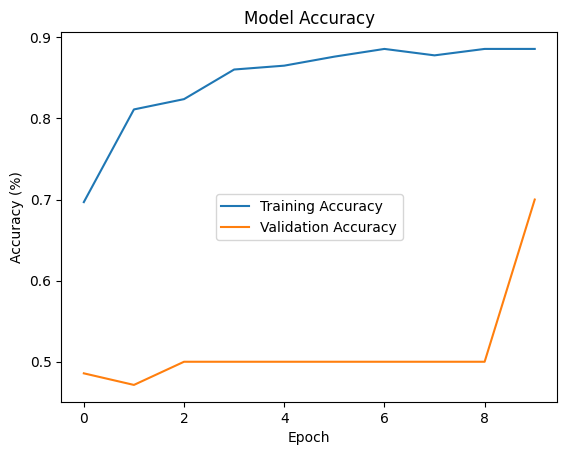

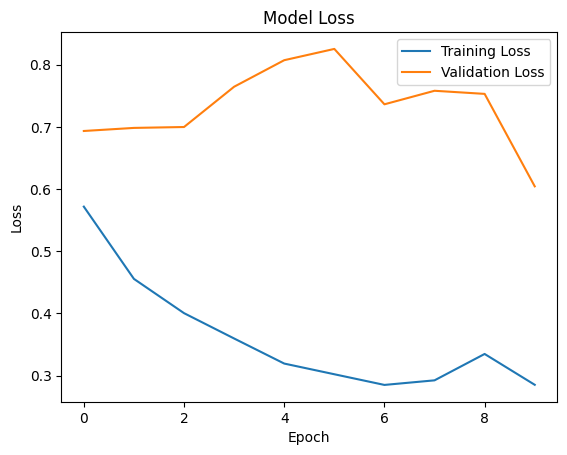

In [ ]:
import matplotlib.pyplot as plt

# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


https://www.kaggle.com/code/satyaprakashshukl/pothole-detection

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Prediction: Plain


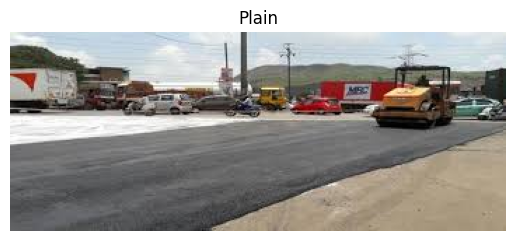

In [ ]:
# Load the saved model
model = load_model('sample.h5')

# Function to predict whether an image contains a pothole or not
def predict_image(image_path):
    size = 100
    img = cv2.imread(image_path, 0)
    img_resized = cv2.resize(img, (size, size))
    img_resized = np.expand_dims(img_resized, axis=-1)
    img_resized = np.expand_dims(img_resized, axis=0)
    prediction = model.predict(img_resized)
    if prediction[0][0] > 0.5:
        return "Plain"
    else:
        return "Pothole"

# Example usage
image_path = "/content/drive/MyDrive/Dataset/test/Plain/5.jpg"
prediction = predict_image(image_path)
print("Prediction:", prediction)

# Displaying the image
img = cv2.imread(image_path)

# Convert BGR image to RGB for displaying with Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img_rgb)
plt.title(prediction)  # Use the prediction as the title
plt.axis('off')  # Hide axis
plt.show()
